In [2]:
import pandas as pd
import numpy as np
import os, tqdm
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [9]:
df = pd.read_csv("balanced-all.csv")
df.head()

,filename,gender
0,data/cv-other-train/sample-069205.npy,female
1,data/cv-valid-train/sample-063134.npy,female
2,data/cv-other-train/sample-080873.npy,female
3,data/cv-other-train/sample-105595.npy,female
4,data/cv-valid-train/sample-144613.npy,female


In [10]:
df["gender"].value_counts()

male      33469
female    33469
Name: gender, dtype: int64

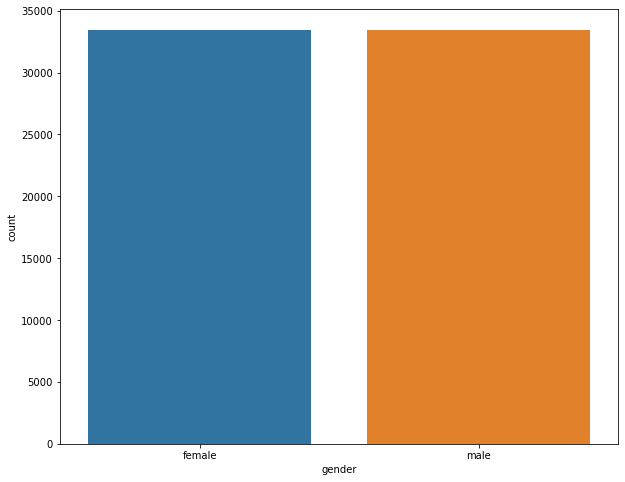

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(df["gender"])
plt.show()

In [12]:
files = []
for i in df["filename"]:
    files.append(i.split("/")[-1])

In [13]:
df["filename"] = files

In [14]:
np.random.shuffle(df.values)

In [15]:
df.head()

,filename,gender
0,sample-123161.npy,male
1,sample-082464.npy,male
2,sample-001708.npy,female
3,sample-149172.npy,male
4,sample-019995.npy,female


In [18]:
label2int = {
    "male": 1,
    "female": 0
}
def load(df, vec_len = 128):
    if not os.path.isdir("output"):
        os.mkdir("output")
    if os.path.isfile("output/features.npy") and os.path.isfile("output/labels.npy"):
        features = np.load("output\features.npy")
        labels = np.load("output\labels.npy")
        return features, labels
    male_sam = int(len(df["gender"])/2)
    female_sam = male_sam
    X = np.zeros((len(df), vec_len))
    y = np.zeros((len(df), 1))
    for i, (file, gender) in tqdm.tqdm(enumerate(zip(df["filename"], df["gender"])), "Loading Data", total=len(df)):
        X[i] = np.load(os.path.join("files", file))
        y[i] = label2int[gender]
    np.save("output/features", X)
    np.save("output/labels", y)
    return X, y

In [19]:
X, y = load(df)

Loading Data: 100%|████████████████████████████████████████████████████████████| 66938/66938 [00:45<00:00, 1470.72it/s]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [22]:
model = Sequential()
model.add(Dense(256, input_shape=(128, )))

In [23]:
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

In [24]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer = "adam")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [27]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
470/470 [==============================] - 7s 7ms/step - loss: 0.7052 - accuracy: 0.6686 - val_loss: 0.5484 - val_accuracy: 0.7907
Epoch 2/100
470/470 [==============================] - 3s 7ms/step - loss: 0.5542 - accuracy: 0.7694 - val_loss: 0.4839 - val_accuracy: 0.8063
Epoch 3/100
470/470 [==============================] - 3s 6ms/step - loss: 0.5048 - accuracy: 0.7912 - val_loss: 0.4547 - val_accuracy: 0.8105
Epoch 4/100
470/470 [==============================] - 3s 6ms/step - loss: 0.4810 - accuracy: 0.8047 - val_loss: 0.4325 - val_accuracy: 0.8268
Epoch 5/100
470/470 [==============================] - 3s 6ms/step - loss: 0.4683 - accuracy: 0.8120 - val_loss: 0.4332 - val_accuracy: 0.8284
Epoch 6/100
470/470 [==============================] - 3s 6ms/step - loss: 0.4566 - accuracy: 0.8180 - val_loss: 0.4288 - val_accuracy: 0.8295
Epoch 7/100
470/470 [==============================] - 3s 6ms/step - loss: 0.4452 - accuracy: 0.8238 - val_loss: 0.4135 - val_accuracy: 0.8371

Epoch 58/100
470/470 [==============================] - 4s 8ms/step - loss: 0.3731 - accuracy: 0.8607 - val_loss: 0.3654 - val_accuracy: 0.8632
Epoch 59/100
470/470 [==============================] - 3s 5ms/step - loss: 0.3726 - accuracy: 0.8611 - val_loss: 0.3743 - val_accuracy: 0.8589
Epoch 60/100
470/470 [==============================] - 3s 6ms/step - loss: 0.3729 - accuracy: 0.8570 - val_loss: 0.3671 - val_accuracy: 0.8619
Epoch 61/100
470/470 [==============================] - 3s 5ms/step - loss: 0.3713 - accuracy: 0.8598 - val_loss: 0.3676 - val_accuracy: 0.8601
Epoch 62/100
470/470 [==============================] - 3s 5ms/step - loss: 0.3694 - accuracy: 0.8590 - val_loss: 0.3731 - val_accuracy: 0.8578
Epoch 63/100
470/470 [==============================] - 3s 5ms/step - loss: 0.3631 - accuracy: 0.8634 - val_loss: 0.3727 - val_accuracy: 0.8644
Epoch 64/100
470/470 [==============================] - 4s 8ms/step - loss: 0.3676 - accuracy: 0.8657 - val_loss: 0.3633 - val_accuracy:

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)

691/691 [==============================] - 1s 2ms/step - loss: 0.3590 - accuracy: 0.8654


In [32]:
accuracy

0.8653689622879028

In [34]:
loss

0.3590347170829773

In [35]:
model.save("output/model.h5")

In [43]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    X, sample_rate = librosa.core.load(file_name)
    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, contrast))
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz))
    return result


In [48]:
model.load_weights("output/model.h5")
file = r"C:\Users\dines\Downloads\gender-recognition-by-voice-master\gender-recognition-by-voice-master\test-samples\27-124992-0003.wav"
features = extract_feature(file, mel=True).reshape(1, -1)
male_prob = model.predict(features)[0][0]
female_prob = 1 - male_prob
gender = "male" if male_prob > female_prob else "female"
print("Result:", gender)
print(f"Probabilities:     Male: {male_prob*100:.2f}%    Female: {female_prob*100:.2f}%")

C:\Users\dines\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:134: FutureWarning: Pass y=[ 0.00117408  0.00154129  0.00125179 ... -0.00065324 -0.00028055
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error


Result: male
Probabilities:     Male: 92.28%    Female: 7.72%
